### Smoothed Bathymetry without SVB - Domain 06 

Extended domain to the west to test if changing the doamin changes the frequency of the peaks in amplitude spectra. Are some of the modes dependent on the domain?

In this bathymetry we REMOVE SEBASTIAN VIZCAINO BAY and flatten the topograpby at the open boundaries so that there are no topography gradients across the open boundaries.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Make sure to use 2020 data because GEBCO 2021 changes the shape of the 250 m isobath! I don;t know which one is better but for consistenciy use 2020.

Domain 6 is bounded by

* north: 35.3 N 
* south: 27.0 N
* west: -123.0 W (domain 5 ended at -122 W)
* east: -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon

Grid
* Horizontal resolution: $\Delta$lon -0.0156 deg (~1.42 km S-1.55 km N) and $\Delta$lat 0.0136 (1.503 km N and S)
* nx=576, ny=612, nz=100, 

OPEN BOUNDARIES: North, West and South

In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_26_Feb_2022_37efbe9660db/gebco_2020_n37.0_s26.0_w-125.0_e-112.0.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2640,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (3120,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  after removing the cwd from sys.path.


In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -124.99791666666667
1 -124.99375
2 -124.98958333333334
3 -124.98541666666667
4 -124.98125
5 -124.97708333333333
6 -124.97291666666666
7 -124.96875
8 -124.96458333333334
9 -124.96041666666667
10 -124.95625000000001
11 -124.95208333333333
12 -124.94791666666666
13 -124.94375
14 -124.93958333333333
15 -124.93541666666667
16 -124.93125
17 -124.92708333333334
18 -124.92291666666667
19 -124.91875
20 -124.91458333333333
21 -124.91041666666666
22 -124.90625
23 -124.90208333333334
24 -124.89791666666667
25 -124.89375000000001
26 -124.88958333333333
27 -124.88541666666666
28 -124.88125
29 -124.87708333333333
30 -124.87291666666667
31 -124.86875
32 -124.86458333333334
33 -124.86041666666667
34 -124.85625
35 -124.85208333333333
36 -124.84791666666666
37 -124.84375
38 -124.83958333333334
39 -124.83541666666667
40 -124.83125000000001
41 -124.82708333333333
42 -124.82291666666666
43 -124.81875
44 -124.81458333333333
45 -124.81041666666667
46 -124.80625
47 -124.80208333333334
48 -124.79791666666667


612 -122.44791666666666
613 -122.44375
614 -122.43958333333333
615 -122.43541666666667
616 -122.43125
617 -122.42708333333334
618 -122.42291666666667
619 -122.41875
620 -122.41458333333333
621 -122.41041666666666
622 -122.40625
623 -122.40208333333334
624 -122.39791666666667
625 -122.39375000000001
626 -122.38958333333333
627 -122.38541666666666
628 -122.38125
629 -122.37708333333333
630 -122.37291666666667
631 -122.36875
632 -122.36458333333334
633 -122.36041666666667
634 -122.35625
635 -122.35208333333333
636 -122.34791666666666
637 -122.34375
638 -122.33958333333334
639 -122.33541666666667
640 -122.33125000000001
641 -122.32708333333333
642 -122.32291666666666
643 -122.31875
644 -122.31458333333333
645 -122.31041666666667
646 -122.30625
647 -122.30208333333334
648 -122.29791666666667
649 -122.29375
650 -122.28958333333333
651 -122.28541666666666
652 -122.28125
653 -122.27708333333334
654 -122.27291666666667
655 -122.26875000000001
656 -122.26458333333333
657 -122.26041666666666
658 

1232 -119.86458333333334
1233 -119.86041666666667
1234 -119.85625
1235 -119.85208333333333
1236 -119.84791666666666
1237 -119.84375
1238 -119.83958333333334
1239 -119.83541666666667
1240 -119.83125000000001
1241 -119.82708333333333
1242 -119.82291666666666
1243 -119.81875
1244 -119.81458333333333
1245 -119.81041666666667
1246 -119.80625
1247 -119.80208333333334
1248 -119.79791666666667
1249 -119.79375
1250 -119.78958333333333
1251 -119.78541666666666
1252 -119.78125
1253 -119.77708333333334
1254 -119.77291666666667
1255 -119.76875000000001
1256 -119.76458333333333
1257 -119.76041666666666
1258 -119.75625
1259 -119.75208333333333
1260 -119.74791666666667
1261 -119.74375
1262 -119.73958333333334
1263 -119.73541666666667
1264 -119.73125
1265 -119.72708333333333
1266 -119.72291666666666
1267 -119.71875
1268 -119.71458333333334
1269 -119.71041666666667
1270 -119.70625000000001
1271 -119.70208333333333
1272 -119.69791666666666
1273 -119.69375
1274 -119.68958333333333
1275 -119.68541666666667

1982 -116.73958333333334
1983 -116.73541666666667
1984 -116.73125
1985 -116.72708333333333
1986 -116.72291666666666
1987 -116.71875
1988 -116.71458333333334
1989 -116.71041666666667
1990 -116.70625000000001
1991 -116.70208333333333
1992 -116.69791666666666
1993 -116.69375
1994 -116.68958333333333
1995 -116.68541666666667
1996 -116.68125
1997 -116.67708333333334
1998 -116.67291666666667
1999 -116.66875
2000 -116.66458333333333
2001 -116.66041666666666
2002 -116.65625
2003 -116.65208333333334
2004 -116.64791666666667
2005 -116.64375000000001
2006 -116.63958333333333
2007 -116.63541666666666
2008 -116.63125
2009 -116.62708333333333
2010 -116.62291666666667
2011 -116.61875
2012 -116.61458333333334
2013 -116.61041666666667
2014 -116.60625
2015 -116.60208333333333
2016 -116.59791666666666
2017 -116.59375
2018 -116.58958333333334
2019 -116.58541666666667
2020 -116.58125000000001
2021 -116.57708333333333
2022 -116.57291666666666
2023 -116.56875
2024 -116.56458333333333
2025 -116.56041666666667

2731 -113.61875
2732 -113.61458333333333
2733 -113.61041666666667
2734 -113.60625
2735 -113.60208333333334
2736 -113.59791666666666
2737 -113.59375
2738 -113.58958333333334
2739 -113.58541666666667
2740 -113.58125
2741 -113.57708333333333
2742 -113.57291666666667
2743 -113.56875
2744 -113.56458333333333
2745 -113.56041666666667
2746 -113.55625
2747 -113.55208333333333
2748 -113.54791666666667
2749 -113.54375
2750 -113.53958333333334
2751 -113.53541666666666
2752 -113.53125
2753 -113.52708333333334
2754 -113.52291666666667
2755 -113.51875
2756 -113.51458333333333
2757 -113.51041666666667
2758 -113.50625
2759 -113.50208333333333
2760 -113.49791666666667
2761 -113.49375
2762 -113.48958333333333
2763 -113.48541666666667
2764 -113.48125
2765 -113.47708333333334
2766 -113.47291666666666
2767 -113.46875
2768 -113.46458333333334
2769 -113.46041666666667
2770 -113.45625
2771 -113.45208333333333
2772 -113.44791666666667
2773 -113.44375
2774 -113.43958333333333
2775 -113.43541666666667
2776 -113.

In [5]:
## Set domain corners
lon1 = 480
lon2 = 2640
lat1 = 240
lat2 = 2232

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1375:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-760:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


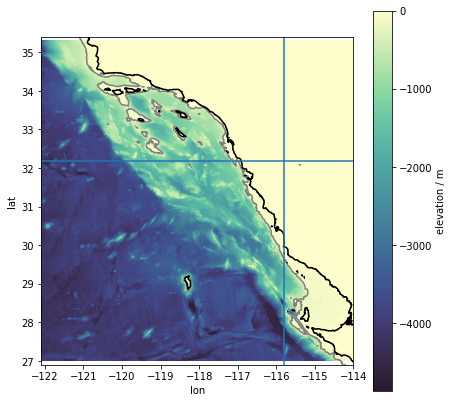

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-122.1,-114)
ax.set_ylim(26.9,35.4)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [7]:
nx = 576
ny = 612

lon_vect = np.round(np.linspace(-123.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.3,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [8]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


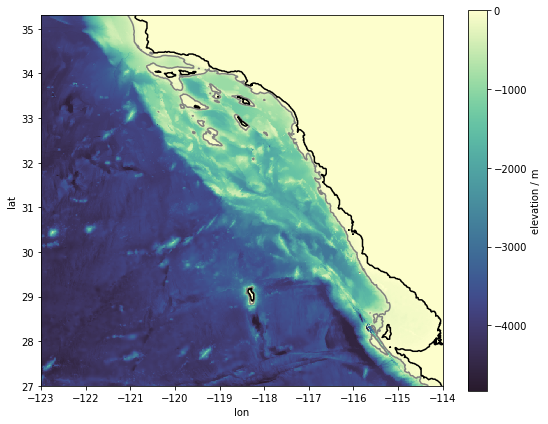

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [10]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [11]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


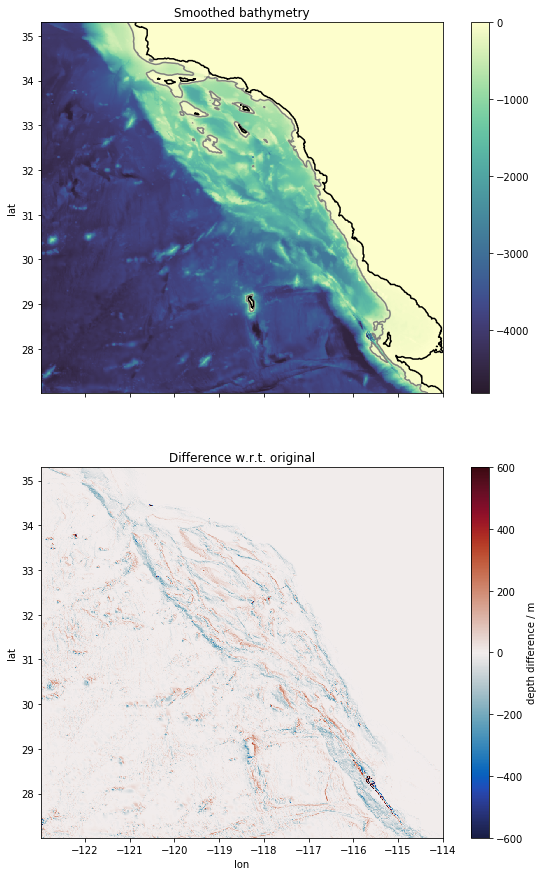

In [12]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [13]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

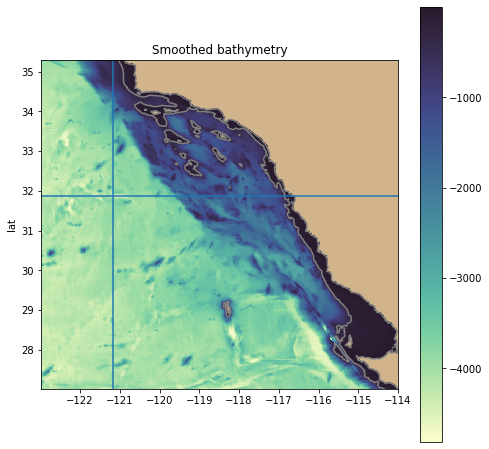

In [14]:
fig, (ax) = plt.subplots(1,1,figsize=(8,8), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
depths = np.ma.masked_array(smooth_bathy, mask=mask)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[0,250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


## Remove the bay

First try: Take shelf slope at A and propagate it south along the shelf break isobath for every j-index (N-S index) up to Punta Euguenia.

The depth at A1 is -152.80 m and at A2 is -2.19 m


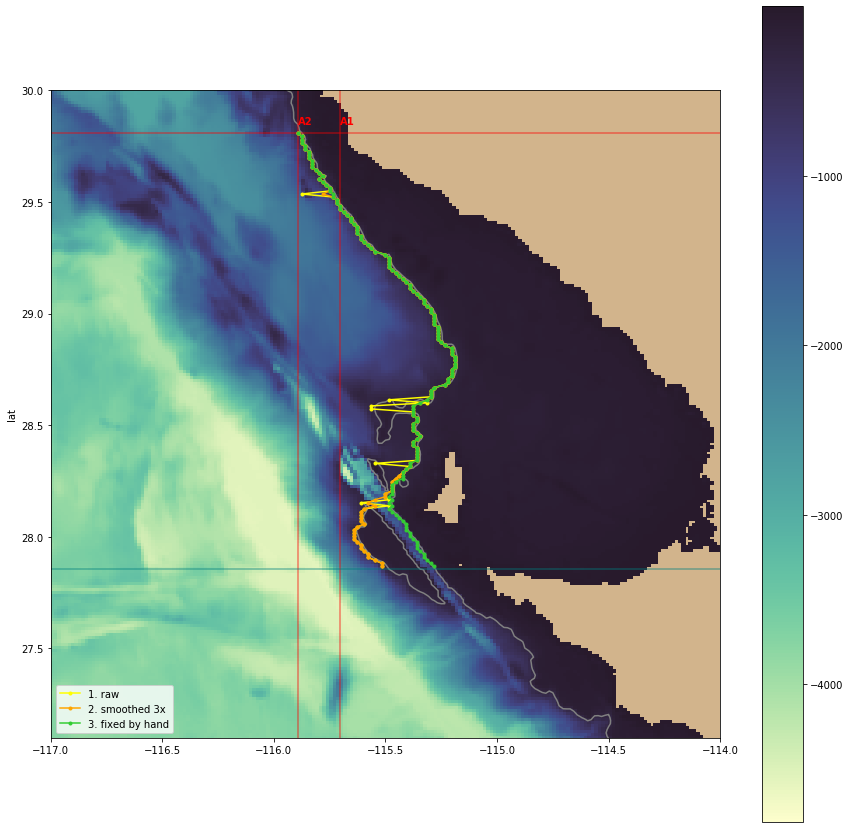

In [15]:
isobath = 250 # shelf break depth

# Initial and final points at A to get the slope
aj = 177+30
ai1 = 392+63
ai2 = 404+63
print('The depth at A1 is %1.2f m and at A2 is %1.2f m' %(depths[aj,ai1],depths[aj,ai2]))

# Punta Eugenia j index
pej = 63

# For each y index, find the x index of the point closest to 250 m isobath.
raw_iind = np.argmin(np.abs(depths[pej:aj,ai1-20:]+isobath), axis=1)

iind=raw_iind.copy()

# Smooth out jumps in 3 passes
for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) >= 10:
        iind[ii+1] = max(iind[ii],iind[ii+1])#int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 4:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 3:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

# Fix the rest by hand
iind_fixed = iind.copy()
iind_fixed[:1] = iind_fixed[:1]+1
iind_fixed[:2] = iind_fixed[:2]+14
iind_fixed[2:3] = iind_fixed[2:3]+15
iind_fixed[3] = iind_fixed[3]+16
iind_fixed[4:7] = iind_fixed[4:7]+16
iind_fixed[7] = iind_fixed[7]+16
iind_fixed[8] = iind_fixed[8]+17
iind_fixed[9] = iind_fixed[9]+17
iind_fixed[10] = iind_fixed[10]+16
iind_fixed[11] = iind_fixed[11]+16
iind_fixed[12] = iind_fixed[12]+15
iind_fixed[13] = iind_fixed[13]+14
iind_fixed[14] = iind_fixed[14]+12
iind_fixed[15] = iind_fixed[15]+12
iind_fixed[16] = iind_fixed[16]+11
iind_fixed[17] = iind_fixed[17]+10
iind_fixed[18] = iind_fixed[18]+9
iind_fixed[19] = iind_fixed[19]+7
iind_fixed[20] = iind_fixed[20]+5
iind_fixed[21] = iind_fixed[21]+6
iind_fixed[22] = iind_fixed[22]+5
iind_fixed[23] = iind_fixed[23]+1
iind_fixed[24] = iind_fixed[24]+2
iind_fixed[28] = iind_fixed[28]+1
iind_fixed[29] = iind_fixed[29]+2
iind_fixed[30] = iind_fixed[30]+1
iind_fixed[123] = iind_fixed[123]+3

# Add slope (depths) from A at each iind
depths_noSVB = depths.copy()
for ii, ind in zip(range(pej,aj),iind_fixed):
    depths_noSVB[ii,ind:ind+(ai2-ai1)]=depths[ii,ai1:ai2]

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[392+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[404+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[raw_iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='yellow', label='1. raw')
ax.plot(lon_vect[iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='orange', label='2. smoothed 3x')
ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')

ax.contour(lon_vect[1:],lat_vect[1:], -depths, colors='0.5', levels=[0,250])
ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

Once we have the indices of the shelf break, we propagate the shelf profile from A south up to Punta Eugenia:

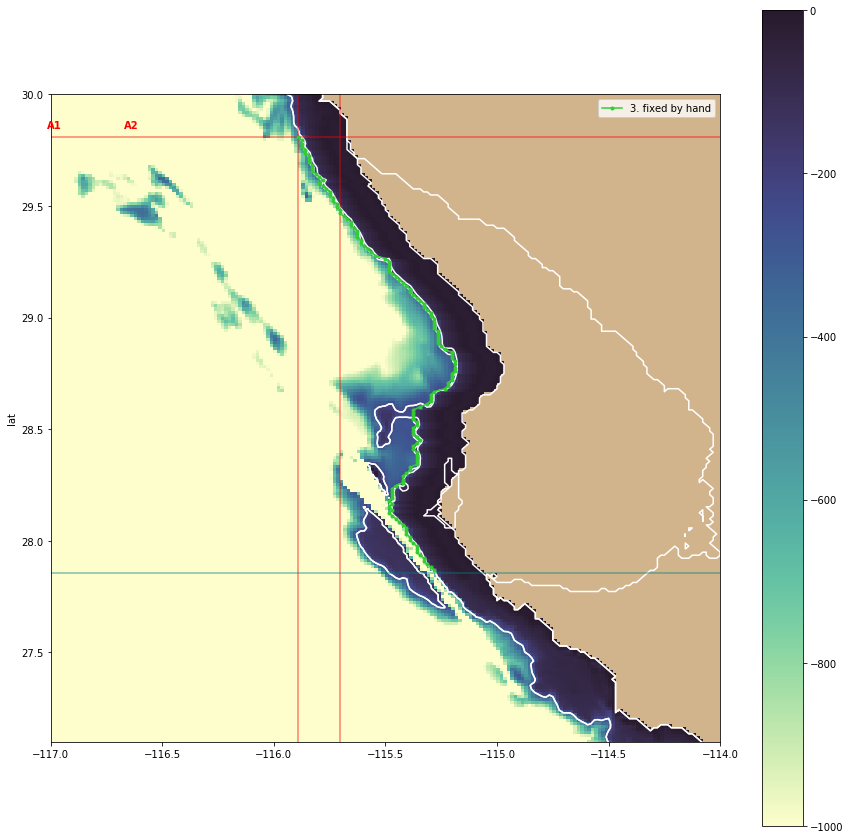

In [16]:
# Add slope (depths) from A at each iind
bathy_noSVB = smooth_bathy.copy()
for ii, ind in zip(range(pej-1,aj),iind_fixed):
    bathy_noSVB[ii,ind+ai1-20:ind+ai1-20+(ai2+61-ai1)]=smooth_bathy[aj,ai1:ai2+61]

# Fill out missing bits in the bay
bathy_noSVB[pej-6:pej,iind_fixed[0]+ai1-3:]=0.0
bathy_noSVB[pej:pej+60,iind_fixed[0]+ai1:]=0.0

# Plot to check
mask_bat = np.ma.masked_values(bathy_noSVB,0)
mask_noSVB = np.ma.getmask(mask_bat)
depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='w', levels=[0,250])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='w', levels=[0,250])

ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # Remove the CWD from sys.path while we load stuff.


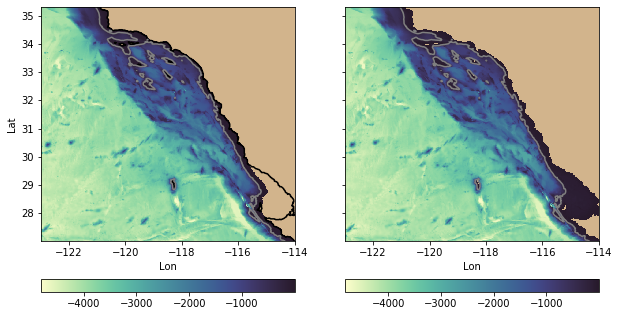

In [17]:
# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Flatten topo at open boundaries

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'


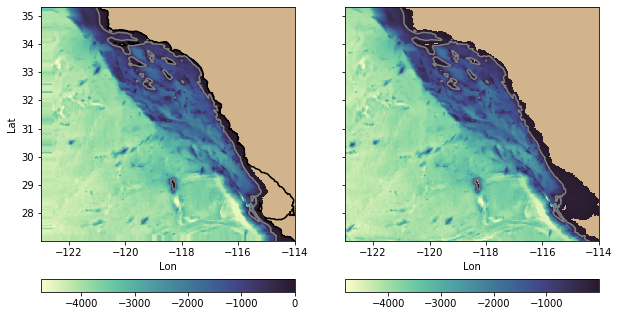

In [18]:
for ii in range(25):
    bathy_noSVB[:,ii] = bathy_noSVB[:,25]

for ii in range(15):
    bathy_noSVB[ii,:] = bathy_noSVB[15,:]

depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Binary file

In [19]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [20]:
dx

array([0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01

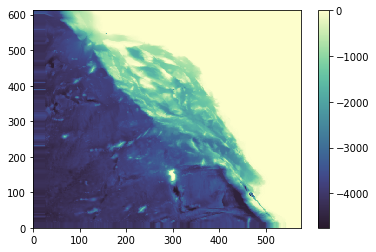

In [21]:
bathy_fname = '576x612/domain6_576x612_noSVB_flatBdy_bat.bin'
dx_fname = '576x612/domain6_576x612_noSVB_flatBdy_dx.bin'
dy_fname = '576x612/domain6_576x612_noSVB_flatBdy_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=bathy_noSVB
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

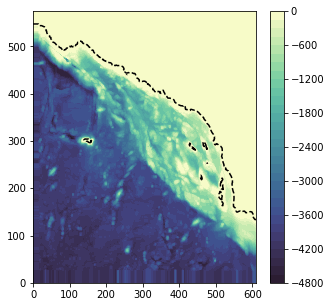

In [22]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
pc2 = ax.contour(bF, levels=[-10], colors='k')

plt.colorbar(pc,ax=ax)
